-------------------
## 1. 데이터 살펴보기 (1)

본격적으로 데이터를 살펴보기에 앞서, 이미지 데이터와 라벨(Annotation)데이터를 연결해 보도록 하겠습니다.

다행히, 이미지 데이터와 라벨 데이터는 확장자 (.jpg, .txt)만 다를 뿐 파일명은 동일합니다.

### [Task 1] 데이터-라벨 연결하기
<실습 목표> : 
- **`annotation_file`** 함수를 완성합니다.
- **`annotation_file`** 함수는 .jpg 파일 이름을 입력했을 때, .txt 확장자로 바꾼 이름을 리턴합니다.


In [2]:
import glob

image_files = list(sorted(glob.glob('./data/Weapon/TrainData/*.jpg'))) # image file명을 list로 저장합니다.
annotation_files = list(sorted(glob.glob('./data/Weapon/TrainData/*txt'))) # annotation file명을 list로 저장합니다.

print("총 데이터 개수: %d\n" % len(image_files))

print('Image 파일명 예시: %s' % image_files[0])
print('Annotation 파일명 예시: %s \n' % annotation_files[0])

총 데이터 개수: 4375

Image 파일명 예시: ./data/Weapon/TrainData/000731dd242627f2.jpg
Annotation 파일명 예시: ./data/Weapon/TrainData/000731dd242627f2.txt 



In [3]:
def annotation_file(file_name):
    """
    (str) file_name : *.jpg 형태의 파일 이름 
    """
    ## [Task 1]: 데이터-라벨 연결하기 ######
    file_name = file_name[:-3]+'txt'

    ######################################
    
    return file_name


# 함수의 작동을 확인합니다.
import random

file = image_files[random.randint(0, 4375)]
print('Image 파일명: %s \n' % file)

annotation = annotation_file(file)
print('Annotation 파일명: %s \n' % annotation)

Image 파일명: ./data/Weapon/TrainData/PUBGGunsInRealLife!10271.jpg 

Annotation 파일명: ./data/Weapon/TrainData/PUBGGunsInRealLife!10271.txt 



-------------------
## 1. 데이터 살펴보기 (2) - 예시 데이터 출력하기

이번에는 데이터의 이미지를 출력하고, 데이터셋에 대한 개략적인 정보를 살펴보도록 하겠습니다.

(이미지가 보이지 않는 경우, 다시 실행해 보세요!)

높이(Height): 720, 너비(Width) 1280, 채널(Channel): 3
픽셀 최댓값: 255.0, 픽셀 최솟값: 0.0



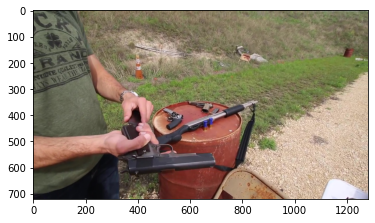

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import pandas as pd

# 예시 파일을 설정합니다.
file = './data/Weapon/TrainData/PUBGGunsInRealLife!06681.jpg'

# 이미지를 불러옵니다.
im = np.array(Image.open(file), dtype=np.uint8)

# 이미지를 출력합니다.
fig,ax = plt.subplots(1)
ax.imshow(im)
# 이미지의 shape을 출력합니다.
print("높이(Height): %d, 너비(Width) %d, 채널(Channel): %d" % (im.shape))
print("픽셀 최댓값: %2.1f, 픽셀 최솟값: %2.1f\n" % (np.max(im), np.min(im)))

-----------
### [Task 2] 데이터 위에 라벨 표시하기
<실습 목표> : 
- **`box_setter`** 함수를 완성합니다.
- **`annotation_getter`** 함수 .jpg 파일 이름을 입력했을 때, Bounding Box의 정보(x0, y0, h, w)를 출력합니다.
    - (x0, y0) <-- Bounding Box의 Upper Left 꼭짓점
    - (h, w) <-- Bounding Box의 높이와 너비
    
    
- **`annotation_getter`** 함수를 이용해 이미지 위에 Bounding Box를 표시해 봅니다.

현재 .txt 파일에 저장되어 있는 bounding box는 (x_center, y_center, box_w, box_h)로 구성되어 있고, 이미지의 너비와 높이에 대한 상대적인 비율로 값이 설정되어 있습니다. 이 값이 **`annotation_getter`** 에서 요구되는 리턴값으로 출력될 수 있도록 함수를 완성해 봅시다.

In [6]:
# [ToDo]: box_setter 함수를 완성합니다.
def box_setter(x_center, y_center, box_w, box_h, img_w, img_h):
    
    w = box_w * img_w
    h = box_h * img_h
    x0 = max((x_center * img_w) - (w/2), 0)
    y0 = max((y_center * img_h) - (h/2), 0)
    
    return x0, y0, w, h


def annotation_getter(file, img_w, img_h):
    file_anno = annotation_file(file)
    bounding_boxes = []
    
    # annotation 파일의 데이터를 불러와 출력합니다.
    df = pd.read_csv(file_anno, sep=' ', names=['cx', 'cy', 'w', 'h'])
    print('Boundig Box 좌표:')
    print(df)
    print()
    for i in range(df.shape[0]):
        x_center, y_center, box_w, box_h = df.iloc[i]
        x0, y0, w, h = box_setter(x_center, y_center, box_w, box_h, img_w, img_h)
        
        print('수정된 Bounding Box [%d]: (x0: %2.1f, y0: %2.1f, w: %2.1f, h: %2.1f)' % (i, x0, y0, w, h))
        rect = patches.Rectangle((x0, y0),w,h,linewidth=1,edgecolor='r',facecolor='none')
        bounding_boxes.append(rect)
    
    print()
    
    return bounding_boxes

im = np.array(Image.open(file), dtype=np.uint8)
img_h, img_w, _ = im.shape 

bounding_boxes = annotation_getter(file, img_w, img_h)

Boundig Box 좌표:
         cx        cy         w         h
0  0.510547  0.586111  0.372656  0.297222
0  0.403516  0.722917  0.297656  0.284722
0  0.417969  0.566667  0.081250  0.111111
0  0.499609  0.509722  0.108594  0.091667

수정된 Bounding Box [0]: (x0: 415.0, y0: 315.0, w: 477.0, h: 214.0)
수정된 Bounding Box [1]: (x0: 326.0, y0: 418.0, w: 381.0, h: 205.0)
수정된 Bounding Box [2]: (x0: 483.0, y0: 368.0, w: 104.0, h: 80.0)
수정된 Bounding Box [3]: (x0: 570.0, y0: 334.0, w: 139.0, h: 66.0)



Boundig Box 좌표:
         cx        cy         w         h
0  0.510547  0.586111  0.372656  0.297222
0  0.403516  0.722917  0.297656  0.284722
0  0.417969  0.566667  0.081250  0.111111
0  0.499609  0.509722  0.108594  0.091667

수정된 Bounding Box [0]: (x0: 415.0, y0: 315.0, w: 477.0, h: 214.0)
수정된 Bounding Box [1]: (x0: 326.0, y0: 418.0, w: 381.0, h: 205.0)
수정된 Bounding Box [2]: (x0: 483.0, y0: 368.0, w: 104.0, h: 80.0)
수정된 Bounding Box [3]: (x0: 570.0, y0: 334.0, w: 139.0, h: 66.0)



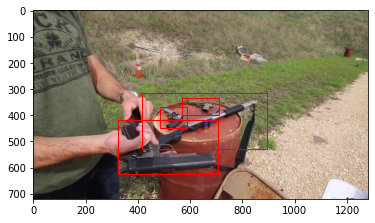

In [7]:
def img_anno_shower():
    # 이미지를 불러옵니다.
    file = './data/Weapon/TrainData/PUBGGunsInRealLife!06681.jpg'
    im = np.array(Image.open(file), dtype=np.uint8)

    # 이미지를 출력합니다.
    fig,ax = plt.subplots(1)
    ax.imshow(im)

    # 이미지의 shape을 저장합니다. 
    img_h, img_w, _ = im.shape
    
    # bounding box를 그립니다.
    bounding_boxes = annotation_getter(file, img_w, img_h)
    for box in bounding_boxes:
        ax.add_patch(box)
        
    plt.show()
    
img_anno_shower()